# Excerise 3
In this exercise you will explore two ways of dealing with overfitting --- the first, model selection (one that you have explored before), and the second, regularization.
For this we will use synthetic data and try to fit a polynomial to this data using regression.

This is a rather short exercise, but will require self learning and exploring.

## Creating the Data
Run the following code to create the data. This creates a synthetic dataset by adding some random Gaussian noise to a sinusoidal function. Note we used a specific seed so that the generated data would be identical in all runs.

Note: in this exercise you should **use the test set as a validation set**, as we will not care about reporting an approximation for the generalization error of our model.

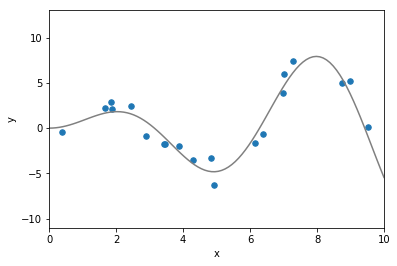

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def f(x):
    return x * np.sin(x)

def plot_fit(ax, X_train=None, y_train=None, model=None, label=None):
  min_x, max_x = np.floor(min(X_train)), np.ceil(max(X_train))
  x_range = np.linspace(min_x, max_x, 100)
  y = f(x_range)
  min_y, max_y = np.floor(min(y))-5, np.ceil(max(y))+5
  ax.plot(x_range, y, color='gray')
  if X_train is not None and y_train is not None:
    ax.scatter(X_train, y_train, s=30)
  if model is not None:
    model.fit(X_train, y_train)
    ax.plot(x_range, model.predict(x_range[:, np.newaxis]), color='red', label=label)
  ax.set_ylim((min_y, max_y))
  ax.set_xlim((min_x, max_x))
  ax.set_ylabel('y')
  ax.set_xlabel('x')
#   ax.legend(loc='upper right')

def create_data(n_samples = 100, test_size=0.8, min_x=0, max_x=10, err_scale=1):
  np.random.seed(9)
  X = np.random.uniform(min_x, max_x, size=n_samples)[:, np.newaxis]
  S = np.random.normal(loc=0, scale=err_scale, size=n_samples)[:, np.newaxis] # loc is mean, and scale is std
  y = f(X) + S
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)
  return X_train, X_test, y_train, y_test

# generate data
X_train, X_test, y_train, y_test = create_data()
plot_fit(plt.gca(), X_train, y_train)

## Polynomial Regression - Model Selection
Apply polynomial regression to the data, using polynomials with maximal degree of 0 to 11. 

- Plot the fitted polynomial against the trainning data and the underlying generating function (that is, for each fitted polynomial, plot that polynomial on top of a graph similar to the one plotted above).
- Do you see underfitting or overfitting? Which is the best degree for this model?
- Apply model selection technique for choosing the best polynomial degree hyperparameter. Explain your results.

### Answer


The 6 degree polynomial model seems to be the best model, not under or overfitted

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


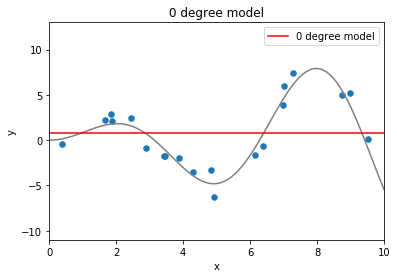

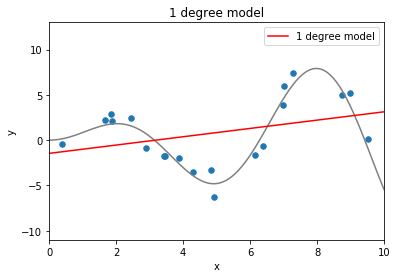

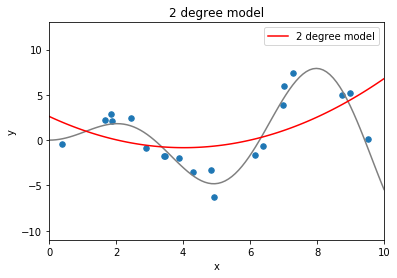

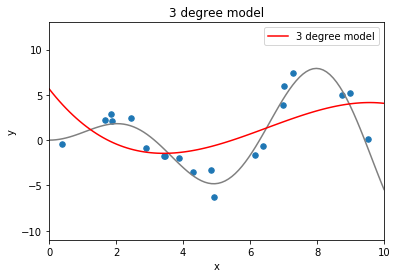

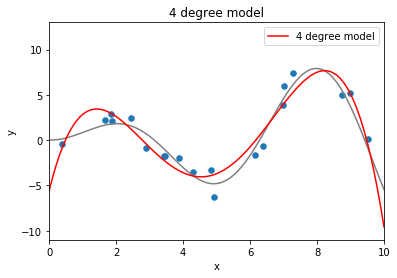

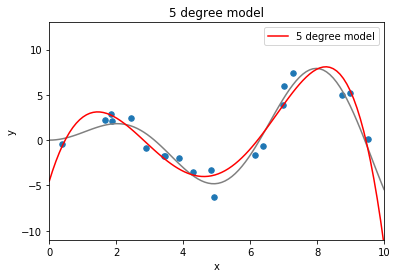

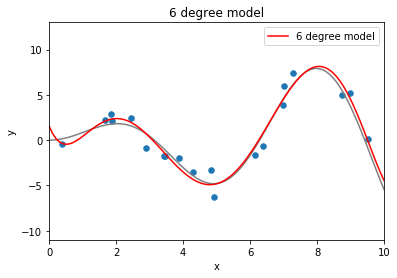

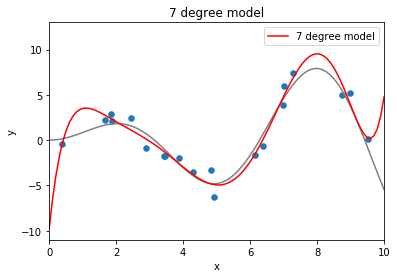

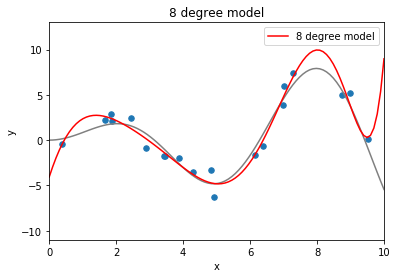

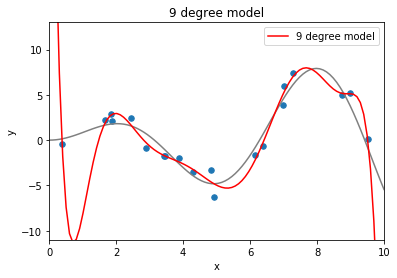

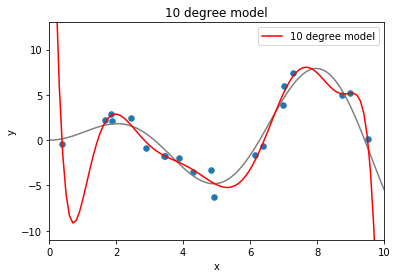

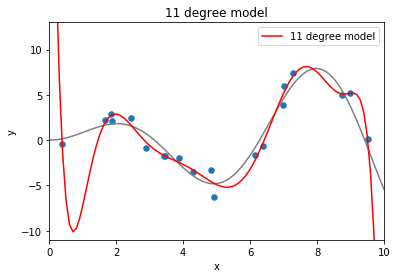

In [3]:
import numpy as np
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
# code goes here

degree_scores = []

X_train, X_test, y_train, y_test = create_data()
for i in range(12):
    model = Pipeline([
        ('poly', PolynomialFeatures(i)),
        ('linreg', LinearRegression())
                     ])
    model.fit(X_train, y_train)
    x = np.linspace(0,10)
    plt.title(str(i) + " degree model")
    plot_fit(plt.gca(), X_train, y_train, model=model, label=str(i) + " degree model")
    plt.show()
    degree_scores.append(model.score(X_test, y_test))
    



In [4]:
best_model = degree_scores.index(max(degree_scores))
print("best_model:", best_model, "degree model")

best_model: 6 degree model


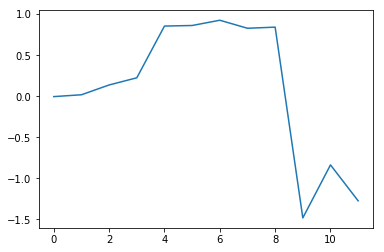

In [5]:
zero_to_eleven = list(range(12))
fig = plt.plot(zero_to_eleven, degree_scores)
plt.show()

## Polynomial Regression - Regularization
Now, instead of choosing the best maximal degree to use, we will use polynomial regression with regularization. 

- Apply polynomial ridge regression with polynomial degree 11, using different regularization parameters (also test the case where the regularization parameter equals 0). For this task you should use L2-norm regularization (ridge regression), which uses the sum of squared parameters as the regularization term (as we saw in class). That is, 
$$
L(\boldsymbol\theta) = \frac{1}{n}\sum_{i=0}^n (y_i – \boldsymbol\theta^T \mathbf{x}_i)^2 + \alpha \|\boldsymbol\theta\|_2
$$
where $\alpha$ is the regularization parameter, $\boldsymbol\theta$ is the vector of coefficients including the intercept term and $\mathbf{x}_i$ is the vector of the predictors of the i-th data point including a constant predictor for the intercept.

>Again, plot the fitted polynomial against the trainning data and the underlying generating function. This time, also plot the coefficients of the fitted polynomial. 

- What is the effect of applying regularization to the regression model, with different regularization parameters? What would be the best regularization parameter to use in this case? Compare your results with the model selection approach for overcoming the the problem of overfitting.

- Compare the above results with L1-norm regularization (LASSO) instead of the L2-norm, that is
$$
L(\boldsymbol\theta) = \frac{1}{n}\sum_{i=0}^n (y_i – \boldsymbol\theta^T \mathbf{x}_i)^2 + \alpha \|\boldsymbol\theta\|_1
$$

### Answer

The best result for L2 was when alpha is equal to -140. Out of the plots graped the best alpha was -200. For L2 the best alpha was about 3.2.



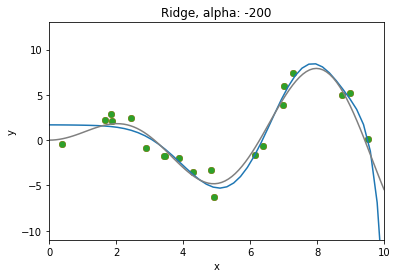

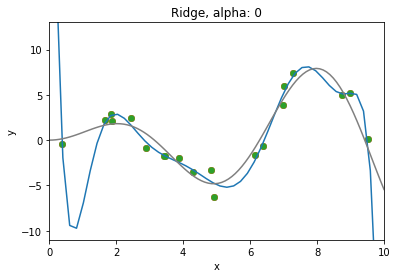

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.141613e-24
  overwrite_a=True).T


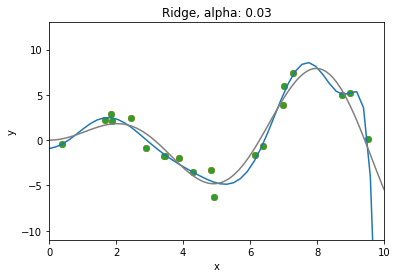

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.628555e-23
  overwrite_a=True).T


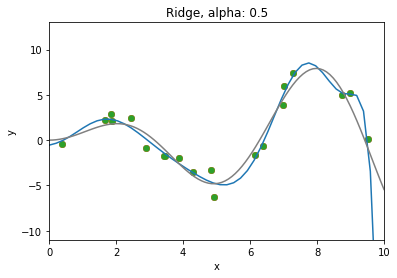

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.197227e-22
  overwrite_a=True).T


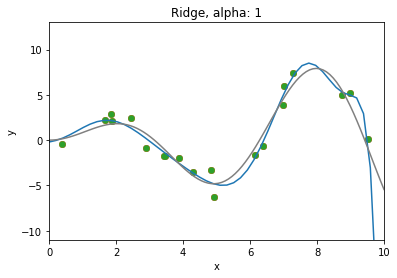

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.920367e-21
  overwrite_a=True).T


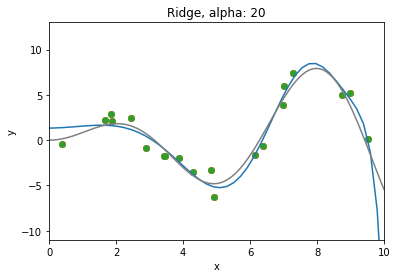

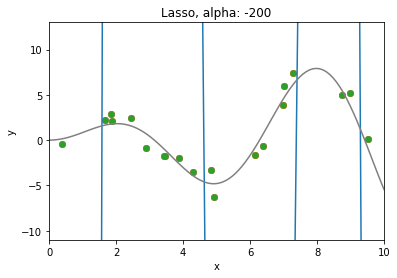

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


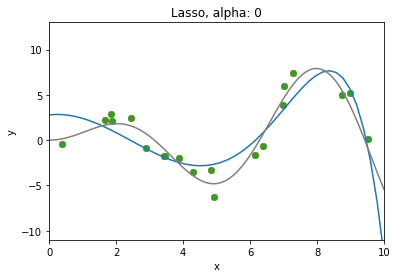

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


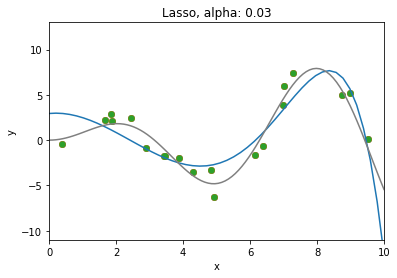

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


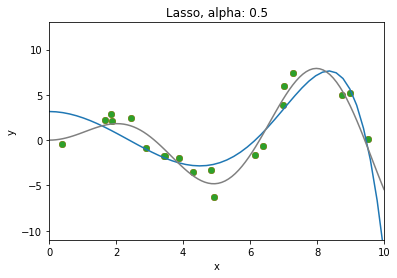

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


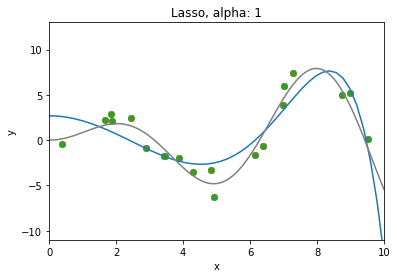

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


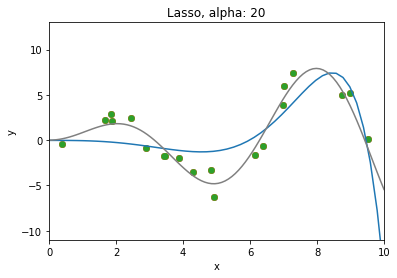

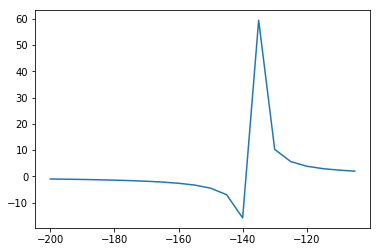

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

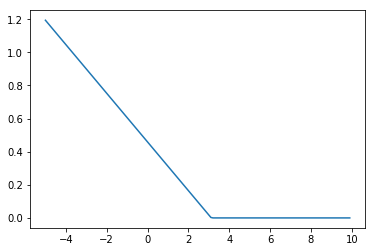

In [82]:
X_train, X_test, y_train, y_test = create_data()
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
import numpy as np


poly = PolynomialFeatures(11)
X_train_poly = poly.fit_transform(X_train)

ranger = [-200, 0, .03, .5, 1, 20]
for a in ranger:
    rr = Ridge(alpha=a)
    rr.fit(X_train_poly, y_train)
    x = np.linspace(0,10)
    x_poly = poly.fit_transform(x.reshape(-1,1))
    plt.scatter(X_train, y_train)
    plt.title("Ridge, alpha: " + str(a))
    x_predict = rr.predict(x_poly)
    plt.scatter(X_train, y_train)
    plt.plot(x, x_predict)
    plot_fit(plt.gca(), X_train, y_train)
    plt.show()

for a in ranger:
    ls = Lasso(alpha=a)
    ls.fit(X_train_poly, y_train)
    x = np.linspace(0,10)
    x_poly = poly.fit_transform(x.reshape(-1,1))
    plt.scatter(X_train, y_train)
    plt.title("Lasso, alpha: " + str(a))
    x_predict = ls.predict(x_poly)
    plt.scatter(X_train, y_train)
    plt.plot(x, x_predict)
    plot_fit(plt.gca(), X_train, y_train)
    plt.show()

ranger = list(np.arange(-200,-100,5))
coefficients = []
for a in ranger:
    rr = Ridge(alpha=a)
    rr.fit(X_train, y_train)
    coefficients.append(rr.coef_)

coefficients = list(np.asarray(coefficients).reshape(-1))
plt.plot(ranger,coefficients)
plt.show()

ranger = list(np.arange(-5,10,.1))
coefficients = []
for a in ranger:
    ls = Lasso(alpha=a)
    ls.fit(X_train, y_train)
    coefficients.append(ls.coef_)

coefficients = list(np.asarray(coefficients).reshape(-1))
plt.plot(ranger,coefficients)
plt.show()